# Lab assignment #3: “Support Vector Machines”
Aazain Ullah Khan - 301277063 - COMP 247
<hr>

## Excercise 1

In [1]:
import pandas as pd
import numpy as np
data_aazain = pd.read_csv('breast_cancer.csv')

In [2]:
# initial investigation
data_aazain.head()

,ID,thickness,size,shape,Marg,Epith,bare,b1,nucleoli,Mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
data_aazain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         699 non-null    int64 
 1   thickness  699 non-null    int64 
 2   size       699 non-null    int64 
 3   shape      699 non-null    int64 
 4   Marg       699 non-null    int64 
 5   Epith      699 non-null    int64 
 6   bare       699 non-null    object
 7   b1         699 non-null    int64 
 8   nucleoli   699 non-null    int64 
 9   Mitoses    699 non-null    int64 
 10  class      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

In [4]:
# missing values
data_aazain.isnull().sum()

ID           0
thickness    0
size         0
shape        0
Marg         0
Epith        0
bare         0
b1           0
nucleoli     0
Mitoses      0
class        0
dtype: int64

In [5]:
data_aazain.describe()

,ID,thickness,size,shape,Marg,Epith,b1,nucleoli,Mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
# replace ? to NaN and convert to float in bare column
data_aazain['bare'] = data_aazain['bare'].replace('?', np.nan)
data_aazain['bare'] = data_aazain['bare'].astype(float)

In [7]:
data_aazain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         699 non-null    int64  
 1   thickness  699 non-null    int64  
 2   size       699 non-null    int64  
 3   shape      699 non-null    int64  
 4   Marg       699 non-null    int64  
 5   Epith      699 non-null    int64  
 6   bare       683 non-null    float64
 7   b1         699 non-null    int64  
 8   nucleoli   699 non-null    int64  
 9   Mitoses    699 non-null    int64  
 10  class      699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [8]:
data_aazain.isnull().sum()

ID            0
thickness     0
size          0
shape         0
Marg          0
Epith         0
bare         16
b1            0
nucleoli      0
Mitoses       0
class         0
dtype: int64

In [9]:
# fill missing values with median value of column
data_aazain = data_aazain.fillna(data_aazain.median())

In [10]:
data_aazain.describe()  # now shows the "bare" column statistics

,ID,thickness,size,shape,Marg,Epith,bare,b1,nucleoli,Mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [11]:
# drop id column
data_aazain = data_aazain.drop('ID', axis=1)

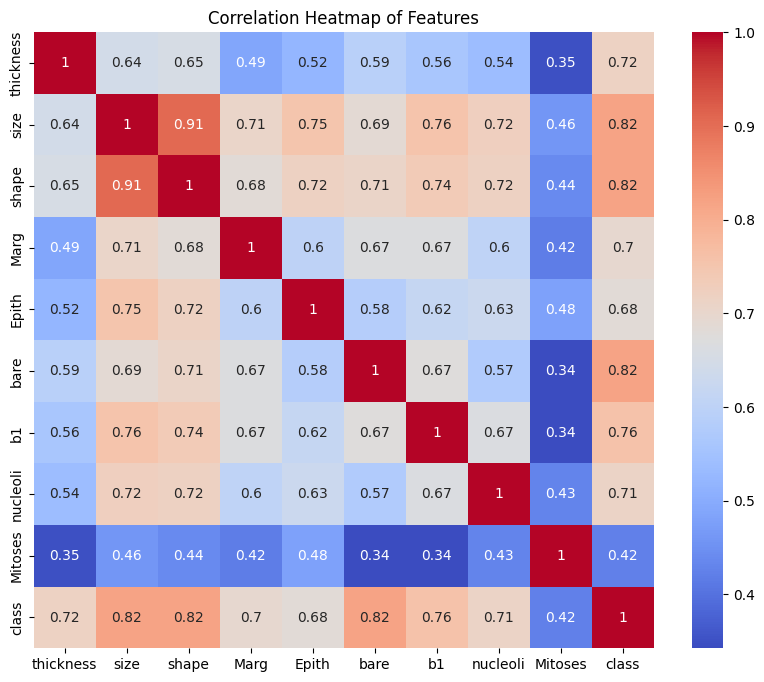

In [12]:
# correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = data_aazain.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

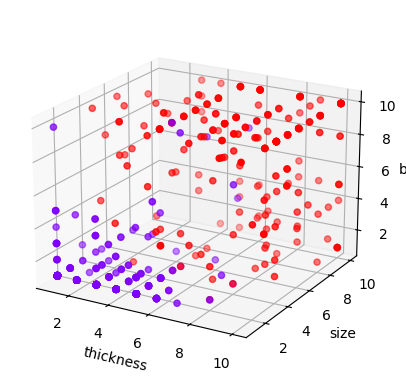

In [13]:
# 3d plot
from mpl_toolkits import mplot3d

# features
feature_1 = 'thickness'
feature_2 = 'size'
feature_3 = 'bare'
X_plot = data_aazain[[feature_1, feature_2, feature_3]]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=20)
ax.scatter3D(X_plot[feature_1], X_plot[feature_2], X_plot[feature_3],
             c=data_aazain['class'], cmap='rainbow')
ax.set_xlabel(feature_1)
ax.set_ylabel(feature_2)
ax.set_zlabel(feature_3)
plt.show()

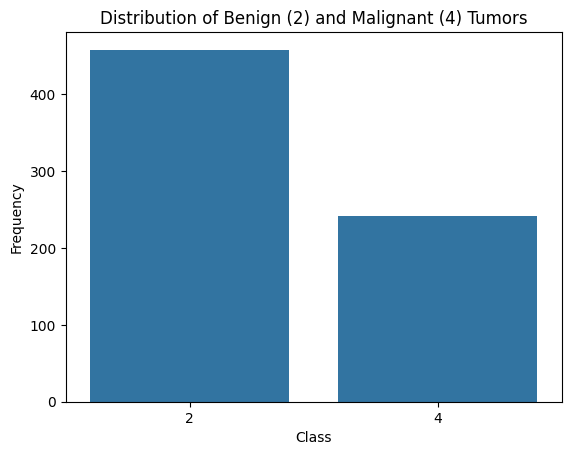

Benign Tumors: 458
Malignant Tumors: 241


In [14]:
# count plot for the target variable
sns.countplot(x='class', data=data_aazain)
plt.title('Distribution of Benign (2) and Malignant (4) Tumors')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

print('Benign Tumors:', data_aazain['class'].value_counts()[2])
print('Malignant Tumors:', data_aazain['class'].value_counts()[4])

In [15]:
# separate the features from the class
X = data_aazain.drop('class', axis=1)
y = data_aazain['class']

In [16]:
# split your data into train 80% and 20% test. random seed = 63

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=63)

In [17]:
# train svm classifier with linear kernel
from sklearn.svm import SVC

clf_linear_aazain = SVC(kernel='linear', C=0.1)
clf_linear_aazain.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

# predictions
y_train_pred = clf_linear_aazain.predict(X_train)
y_test_pred = clf_linear_aazain.predict(X_test)

# accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix: \n", conf_matrix)

Training Accuracy: 0.9713774597495528
Testing Accuracy: 0.9571428571428572
Confusion Matrix: 
 [[91  4]
 [ 2 43]]


In [19]:

# repeat the process with rbf kernel and no C value

clf_rbf_aazain = SVC(kernel='rbf')
clf_rbf_aazain.fit(X_train, y_train)

SVC()

In [20]:
# predictions
y_train_pred = clf_rbf_aazain.predict(X_train)
y_test_pred = clf_rbf_aazain.predict(X_test)

# accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix: \n", conf_matrix)

Training Accuracy: 0.9731663685152058
Testing Accuracy: 0.9571428571428572
Confusion Matrix: 
 [[91  4]
 [ 2 43]]


In [21]:
# repeat with poly kernel and C is not set to any value

clf_poly_aazain = SVC(kernel='poly')
clf_poly_aazain.fit(X_train, y_train)

SVC(kernel='poly')

In [22]:
# predictions
y_train_pred = clf_poly_aazain.predict(X_train)
y_test_pred = clf_poly_aazain.predict(X_test)

# accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix: \n", conf_matrix)

Training Accuracy: 0.9838998211091234
Testing Accuracy: 0.9571428571428572
Confusion Matrix: 
 [[93  2]
 [ 4 41]]


In [23]:
# repeat with sigmoid kernel and C is not set to any value

clf_sigmoid_aazain = SVC(kernel='sigmoid')
clf_sigmoid_aazain.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [24]:
# predictions
y_train_pred = clf_sigmoid_aazain.predict(X_train)
y_test_pred = clf_sigmoid_aazain.predict(X_test)

# accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix: \n", conf_matrix)

Training Accuracy: 0.40608228980322003
Testing Accuracy: 0.35
Confusion Matrix: 
 [[48 47]
 [44  1]]


## Excercise 2

In [25]:
data_aazain_df2 = pd.read_csv('breast_cancer.csv')

In [26]:
# replace ? to nan in bare column
data_aazain_df2['bare'] = data_aazain_df2['bare'].replace('?', np.nan)

In [27]:
# drop id column
data_aazain_df2 = data_aazain_df2.drop('ID', axis=1)

# separate the features from the class
X = data_aazain_df2.drop('class', axis=1)
y = data_aazain_df2['class']

In [28]:
# split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=63)

In [29]:
# transform training data with imputer and scaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# fill missing values with median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)

# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

In [30]:
# combine transformers into a pipeline
from sklearn.pipeline import Pipeline

num_pipe_aazain = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [31]:
# pipline with num_pipe_aazain and svm
pipe_svm_aazain = Pipeline([
    ('preprocessing', num_pipe_aazain),
    ('svm', SVC(random_state=63))
])


num_pipe_aazain

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [32]:
# define the grid search parameters
param_grid = [
    {'svm__kernel': ['linear', 'rbf', 'poly'],
     'svm__C': [0.01, 0.1, 1, 10, 100],
     'svm__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
     'svm__degree': [2, 3]}
]

param_grid

[{'svm__kernel': ['linear', 'rbf', 'poly'],
  'svm__C': [0.01, 0.1, 1, 10, 100],
  'svm__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
  'svm__degree': [2, 3]}]

In [33]:
# create a grid search object
from sklearn.model_selection import GridSearchCV

grid_search_aazain = GridSearchCV(
    pipe_svm_aazain, param_grid, scoring='accuracy', refit=True, verbose=3)

grid_search_aazain

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer(strategy='median')),
                                                        ('scaler',
                                                         StandardScaler())])),
                                       ('svm', SVC(random_state=63))]),
             param_grid=[{'svm__C': [0.01, 0.1, 1, 10, 100],
                          'svm__degree': [2, 3],
                          'svm__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'svm__kernel': ['linear', 'rbf', 'poly']}],
             scoring='accuracy', verbose=3)

In [34]:
# fit training data to the gird search object
grid_search_aazain.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END svm__C=0.01, svm__degree=2, svm__gamma=0.01, svm__kernel=linear;, score=0.955 total time=   0.0s
[CV 2/5] END svm__C=0.01, svm__degree=2, svm__gamma=0.01, svm__kernel=linear;, score=0.973 total time=   0.0s
[CV 3/5] END svm__C=0.01, svm__degree=2, svm__gamma=0.01, svm__kernel=linear;, score=0.973 total time=   0.0s
[CV 4/5] END svm__C=0.01, svm__degree=2, svm__gamma=0.01, svm__kernel=linear;, score=0.973 total time=   0.0s
[CV 5/5] END svm__C=0.01, svm__degree=2, svm__gamma=0.01, svm__kernel=linear;, score=0.973 total time=   0.0s
[CV 1/5] END svm__C=0.01, svm__degree=2, svm__gamma=0.01, svm__kernel=rbf;, score=0.652 total time=   0.0s
[CV 2/5] END svm__C=0.01, svm__degree=2, svm__gamma=0.01, svm__kernel=rbf;, score=0.652 total time=   0.0s
[CV 3/5] END svm__C=0.01, svm__degree=2, svm__gamma=0.01, svm__kernel=rbf;, score=0.652 total time=   0.0s
[CV 4/5] END svm__C=0.01, svm__degree=2, svm__gamma=0.01, svm__ker

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer(strategy='median')),
                                                        ('scaler',
                                                         StandardScaler())])),
                                       ('svm', SVC(random_state=63))]),
             param_grid=[{'svm__C': [0.01, 0.1, 1, 10, 100],
                          'svm__degree': [2, 3],
                          'svm__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'svm__kernel': ['linear', 'rbf', 'poly']}],
             scoring='accuracy', verbose=3)

In [35]:
# print out the best parameters best estimator
print(f"Best Parameters: {grid_search_aazain.best_params_}")
print(f"Best Estimator: {grid_search_aazain.best_estimator_}")

Best Parameters: {'svm__C': 0.1, 'svm__degree': 2, 'svm__gamma': 0.03, 'svm__kernel': 'rbf'}
Best Estimator: Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('svm', SVC(C=0.1, degree=2, gamma=0.03, random_state=63))])


In [36]:
best_model_aazain = grid_search_aazain.best_estimator_

In [37]:
# fit the best model to the training data
best_model_aazain.fit(X_train, y_train)

# predictions
y_train_pred = best_model_aazain.predict(X_train)
y_test_pred = best_model_aazain.predict(X_test)

# accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.9731663685152058
Testing Accuracy: 0.9571428571428572


In [38]:
# save the model using joblib
import joblib

joblib.dump(best_model_aazain, 'best_model_aazain.pkl')

# save the pipeline using joblib
joblib.dump(pipe_svm_aazain, 'full_pipeline_aazain.pkl')

['full_pipeline_aazain.pkl']